In [1]:
# ht3
# Roberto Rios
# Javier Valle 20159


### Ejercicio 1

#### lo primero que se hizo fue separar las variables en numericas y categoricas, luego, se hicieron distintos dataframes para abordar cada problema, en algunos casos sera necesario limpiar la data de valores repetidos, NaN o valores que actuan como booleanos sin serlo explicitamente 

   years          price
0   2006  182549.458599
1   2007  186063.151976
2   2008  177360.838816
3   2009  179432.103550
4   2010  177393.674286


<AxesSubplot:xlabel='years'>

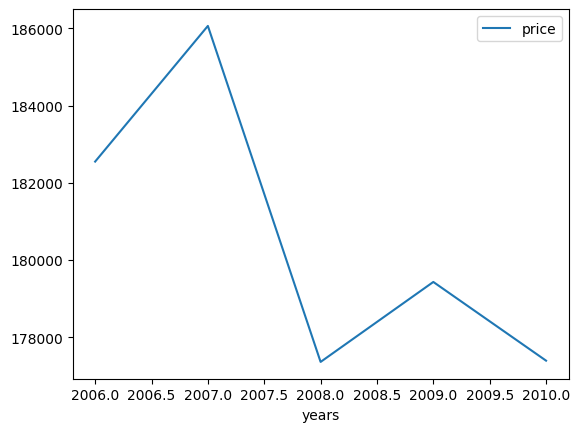

In [68]:
# ejercicio 1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('train.csv')

numericals = df.select_dtypes(include=['int64', 'float64'])
categoricals = df.select_dtypes(include=['object'])

df2 = pd.DataFrame()
# grouped = pd.DataFrame()
df2['years'] = df['YrSold']
df2['price'] = df['SalePrice']
grouped = df2.groupby('years').mean()
grouped = grouped.reset_index()

print(grouped)
grouped.plot.line(x='years',y='price')
# print(numericals.head(0))
# print(numericals['LotArea'])


#### La grafica anterior nos indica que la tendencia del precio de las casas del 2007 al 2010 bajo, quizas por la recesion

     years          price
0     1872  122000.000000
1     1875   94000.000000
2     1880  200619.750000
3     1882  168000.000000
4     1885  111250.000000
..     ...            ...
107   2006  251775.447761
108   2007  255362.734694
109   2008  348849.130435
110   2009  269220.000000
111   2010  394432.000000

[112 rows x 2 columns]


<AxesSubplot:xlabel='years'>

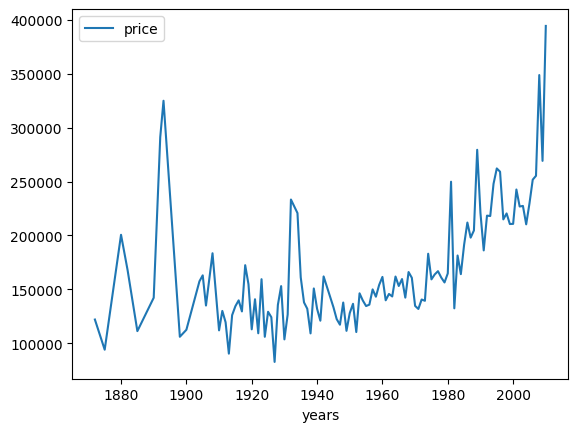

In [66]:
df2 = pd.DataFrame()
# grouped = pd.DataFrame()
df2['years'] = df['YearBuilt']
df2['price'] = df['SalePrice']
grouped = df2.groupby('years').mean()
grouped = grouped.reset_index()

print(grouped)
grouped.plot.line(x='years',y='price')

#### aqui se puede ver la relacion entre el a;o en el que se construyeron y el precio al que se vendieron las casas

In [57]:

counts = df['PoolArea'].value_counts()

counts = counts.reset_index()

# counts.plot.bar(x='index', y='PoolArea')

print(counts)

   index  PoolArea
0      0      1453
1    480         1
2    512         1
3    519         1
4    555         1
5    576         1
6    648         1
7    738         1


#### aqui podemos ver que solo 7 casas tienen piscina, las 1453 demas no

In [61]:

counts = df['GarageArea'].value_counts()

counts = counts.reset_index()

# counts.plot.line(y='index', x='GarageArea')

print(counts)

     index  GarageArea
0        0          81
1      440          49
2      576          47
3      240          38
4      484          34
..     ...         ...
436    671           1
437    342           1
438    673           1
439    675           1
440   1418           1

[441 rows x 2 columns]


#### solo 81 casas no tienen garage 

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

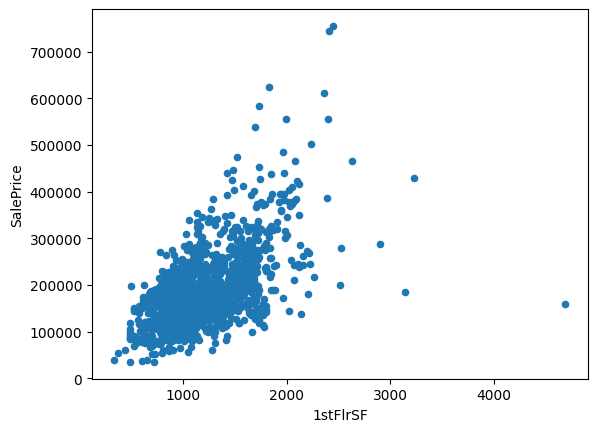

In [64]:
df.plot.scatter(x='1stFlrSF', y='SalePrice')

In [ ]:
### al parecer, existe una leve relacion entre el precio y la superficie del primer piso

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

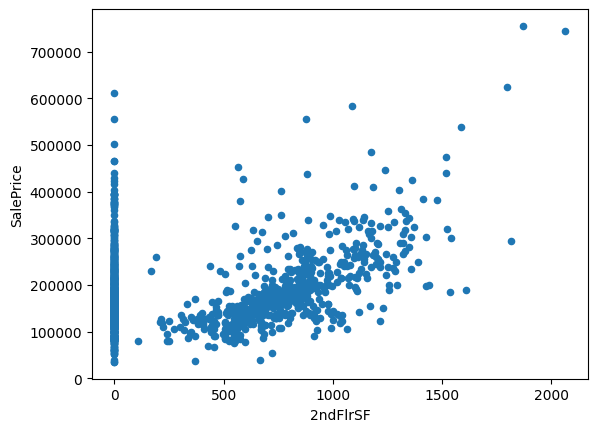

In [65]:
df.plot.scatter(x='2ndFlrSF', y='SalePrice')


#### al parecer, existe una leve relacion entre el precio y la superficie del segundo piso, sin embargo, existe un grupo de casas sin segundo piso cuyo precio es muy variante


      index  Neighborhood
0     NAmes           225
1   CollgCr           150
2   OldTown           113
3   Edwards           100
4   Somerst            86
5   Gilbert            79
6   NridgHt            77
7    Sawyer            74
8    NWAmes            73
9   SawyerW            59
10  BrkSide            58
11  Crawfor            51
12  Mitchel            49
13  NoRidge            41
14   Timber            38
15   IDOTRR            37
16  ClearCr            28
17  StoneBr            25
18    SWISU            25
19  MeadowV            17
20  Blmngtn            17
21   BrDale            16
22  Veenker            11
23  NPkVill             9
24  Blueste             2


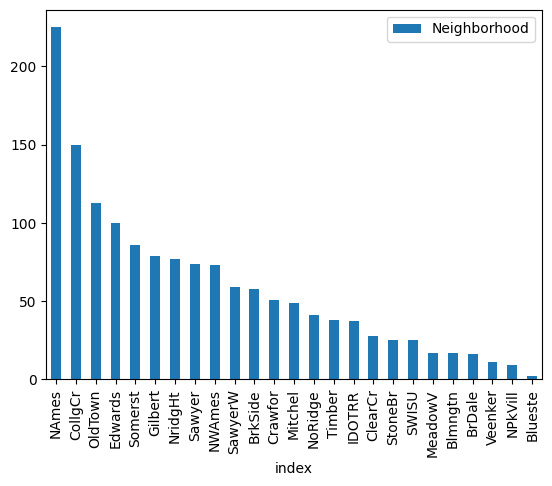

In [75]:
counts = df['Neighborhood'].value_counts()

counts = counts.reset_index()

counts.plot.bar(x='index', y='Neighborhood')

print(counts)

#### se puede observar la tendencia de la cantidad de casas en cada vecindario

    index  HouseStyle
0  1Story         726
1  2Story         445
2  1.5Fin         154
3    SLvl          65
4  SFoyer          37
5  1.5Unf          14
6  2.5Unf          11
7  2.5Fin           8


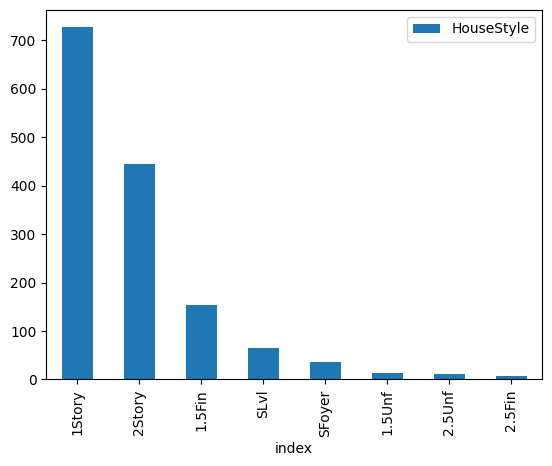

In [76]:
counts = df['HouseStyle'].value_counts()

counts = counts.reset_index()

counts.plot.bar(x='index', y='HouseStyle')

print(counts)

#### la cantidad de casas por estilo (HouseStyle)

    style          price
0  1.5Fin  143116.740260
1  1.5Unf  110150.000000
2  1Story  175985.477961
3  2.5Fin  220000.000000
4  2.5Unf  157354.545455
5  2Story  210051.764045
6  SFoyer  135074.486486
7    SLvl  166703.384615


<AxesSubplot:ylabel='style'>

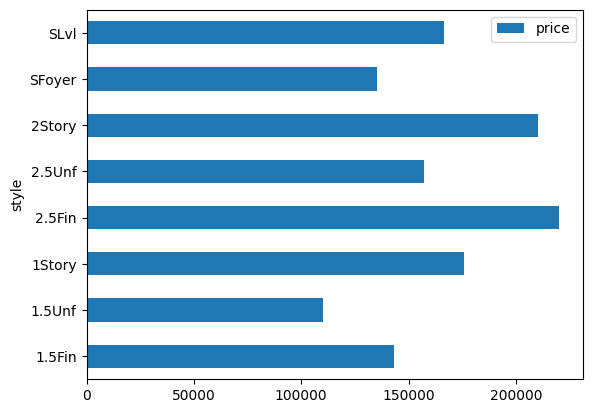

In [78]:
df2 = pd.DataFrame()
# grouped = pd.DataFrame()
df2['style'] = df['HouseStyle']
df2['price'] = df['SalePrice']
grouped = df2.groupby('style').mean()
grouped = grouped.reset_index()

print(grouped)
grouped.plot.barh(x='style',y='price')

#### aqui podemos ver la media de los precios a los que se vendieron las casas agrupado por estilo

In [83]:
indexes = df['SalePrice'].sort_values(ascending=False).head(10).index.to_list()
results = df.loc[indexes, 'Neighborhood']
print("Vecindarios en donde se encuentran las 10 casas mas costosas: ")
print(results)



Vecindarios en donde se encuentran las 10 casas mas costosas: 
691     NoRidge
1182    NoRidge
1169    NoRidge
898     NridgHt
803     NridgHt
1046    StoneBr
440     NridgHt
769     StoneBr
178     StoneBr
798     NridgHt
Name: Neighborhood, dtype: object


#### Vecindarios en donde se encuentran las 10 casas mas costosas


Sale types de las 10 casas mas costosas: 
691      WD
1182     WD
1169     WD
898     New
803     New
1046    New
440      WD
769      WD
178     New
798     New
Name: SaleType, dtype: object

sale types: 
   index  SaleType
0     WD      1267
1    New       122
2    COD        43
3  ConLD         9
4  ConLw         5
5  ConLI         5
6    CWD         4
7    Oth         3
8    Con         2


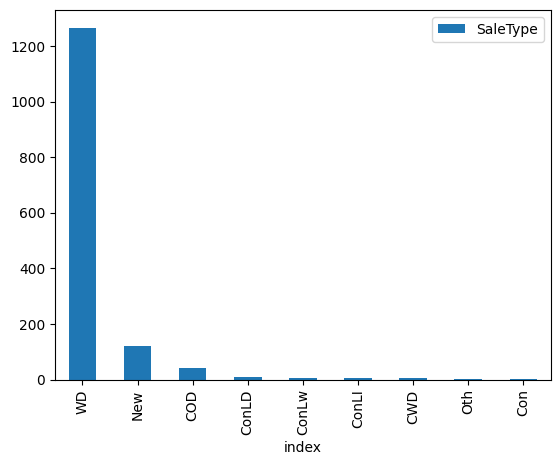

In [86]:
indexes = df['SalePrice'].sort_values(ascending=False).head(10).index.to_list()
results = df.loc[indexes, 'SaleType']
print("\nSale types de las 10 casas mas costosas: ")
print(results)

counts = df['SaleType'].value_counts()

counts = counts.reset_index()

counts.plot.bar(x='index', y='SaleType')
print('\nsale types: ')
print(counts)


#### la mayoria de las ventas son WD, sin embargo, en el top 10 mas caras, la mitad de las casas son nuevas

In [94]:
# ejercicio 3

num = """LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GarageCars,GarageArea,PoolArea,MoSold,YrSold,SalePrice"""

cat = """Street,Utilities,Neighborhood,HouseStyle,RoofStyle,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,GarageCond,Fence,SaleType,SaleCondition"""

l = num.split(',')
# l.extend(cat.split(','))
# print(l)

mat = pd.DataFrame()
for i in l:
    mat[i] = df[i]

# print(mat)
X = np.array(mat)
print(X)

[[  8450   2003   2003 ...      2   2008 208500]
 [  9600   1976   1976 ...      5   2007 181500]
 [ 11250   2001   2002 ...      9   2008 223500]
 ...
 [  9042   1941   2006 ...      5   2010 266500]
 [  9717   1950   1996 ...      4   2010 142125]
 [  9937   1965   1965 ...      6   2008 147500]]


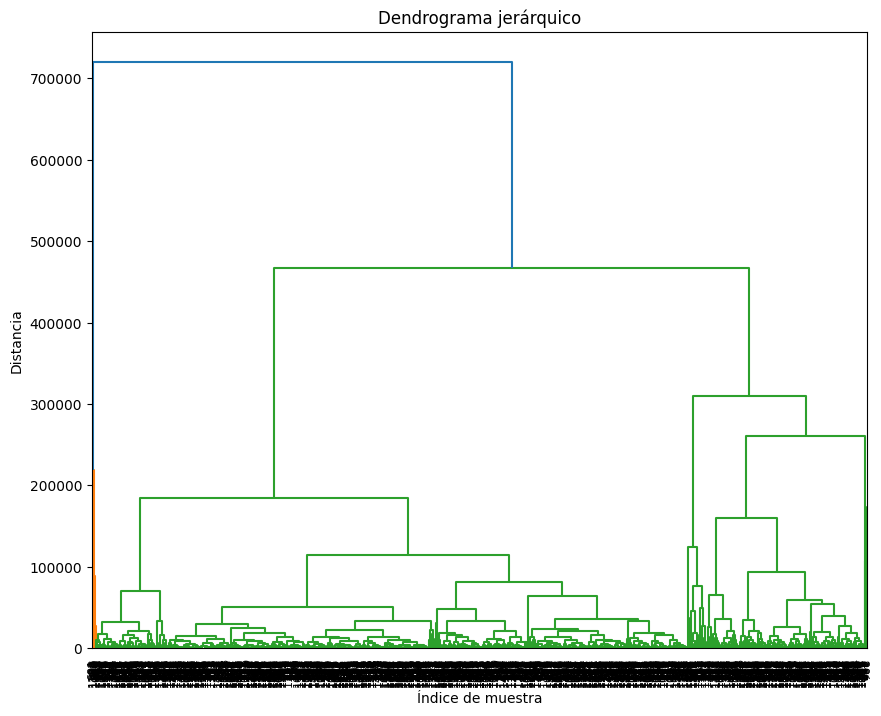

In [96]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X, 'complete')

plt.figure(figsize=(10, 8))
plt.title('Dendrograma jerárquico')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [105]:
from scipy.cluster.hierarchy import fcluster

k = 8
groups = fcluster(Z, k, criterion='maxclust')
print(groups)
# data = df.copy()
mat['group'] = groups
mat.groupby('group').mean()

[4 4 6 ... 6 4 4]


,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GarageCars,GarageArea,PoolArea,MoSold,YrSold,SalePrice
group,,,,,,,,,,,
1,18579.000000,1995.000000,1995.500000,2427.500000,1968.500000,3.000000,822.500000,277.500000,4.000000,2007.000000,750000.000000
2,24593.500000,2004.666667,2005.333333,2002.166667,891.500000,3.000000,812.666667,0.000000,4.666667,2008.333333,578195.166667
3,7087.355556,1940.162963,1963.911111,837.266667,166.192593,0.903704,236.770370,0.000000,6.081481,2008.000000,84342.474074
4,9431.420838,1968.070480,1982.587334,1086.901941,301.915220,1.647600,435.366701,1.740552,6.212462,2007.818182,155002.421859
5,15714.171429,1999.028571,2004.685714,1898.600000,476.057143,2.914286,813.657143,0.000000,6.685714,2007.828571,415868.514286
6,12432.500000,1991.845638,1999.070470,1438.093960,542.895973,2.379195,653.080537,5.936242,6.775168,2007.724832,268536.315436
7,127392.500000,1967.250000,1987.000000,1605.000000,216.750000,2.000000,558.250000,0.000000,8.000000,2007.000000,271987.500000
8,215245.000000,1965.000000,1965.000000,2036.000000,0.000000,2.000000,513.000000,0.000000,6.000000,2009.000000,375000.000000


#### analisis por grupos

por cada cluster se observan precios de venta, los que tienen piscina, los que tienen segundo piso, los a;os en los que se construyeron, modificaron y vendieron

In [ ]:
# ejercicio 4


C:\Users\sebas\AppData\Local\Temp\ipykernel_23432\2758044105.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = csv.corr()


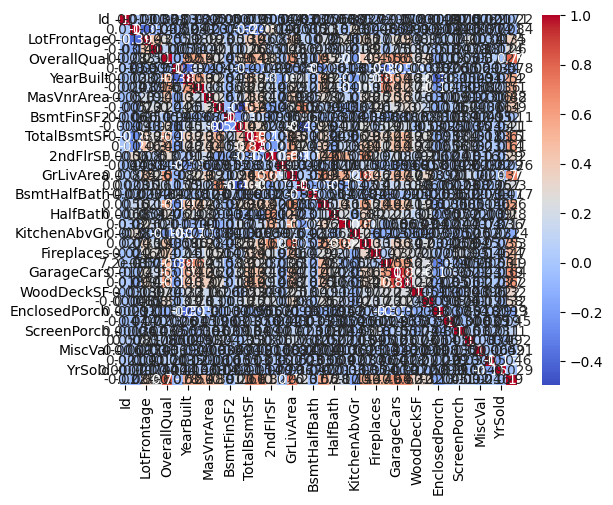

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [1]:
# Ejercicio 5: Haga ingeniería de características, ¿qué variables cree que puedan ser mejores predictores para el precio de las casas? Explique en que basó la selección o no de las variables. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Verificando que variables pueden ser mejores predictores para el precio de las casas.
csv = pd.read_csv('train.csv')
csv.head()

# Calcular matriz de correlación
corr_matrix = csv.corr()

# Visualizar matriz de correlación con Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Viendo las columnas que tienen una correlación mayor a 0.5.
corr_matrix['SalePrice'].sort_values(ascending=False)



In [3]:
# Inciso 6

csv = pd.read_csv('train.csv') # Datos.

# Usando el precio de la SalePrice y el OverallCond.
SalePrice = csv.pop("SalePrice") # Variable de respuesta.
y = csv.pop("OverallCond") # Variable de respuesta.
x = csv # Resto de los datos.

# Haciendo entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

# Haciendo la regresión lineal.
precio = y_train.values.reshape(-1, 1)
condicion = precio.reshape(-1, 1)

precios = precio[:30]
condiciones = condicion[:30]

# OverallQual.
calidad = X_train["OverallQual"].values.reshape(-1, 1)
calidad_t = X_test["OverallQual"].values.reshape(-1, 1)

calidads = calidad[:30]
calidad_ts = calidad_t[:30]

# print("Listas minimizadas: ", precios, condiciones, calidads, calidad_ts)

lm = LinearRegression()
lm.fit(condicion, calidad)
calidad_pred = lm.predict(calidad_t)

calidad_preds = calidad_pred[:30]

# Haciendo la ecuación de la recta.
m = lm.coef_[0][0]
b = lm.intercept_[0]
print("La ecuación de la recta es: y = {}x + {}".format(m, b))

fig = plt.figure()
plt.scatter(condiciones, calidads)
plt.plot(condiciones, calidad_preds, color='green')
plt.title("OverallCond vs OverallQual")
plt.xlabel("OverallCond")
plt.ylabel("OverallQual")
plt.show()

print("Error medio: ", mean_squared_error(condiciones, calidad_preds))
print("R2: ", r2_score(condiciones, calidad_preds))


NameError: name 'train_test_split' is not defined

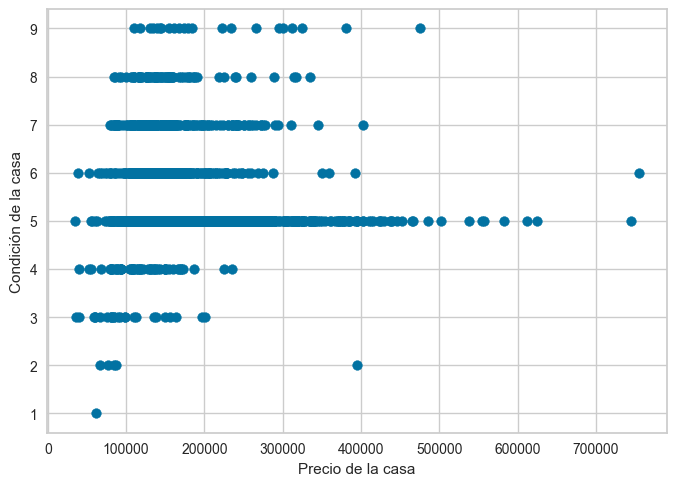

Coeficiente:  [[-1.09057474e-06]]
Intercepto:  [5.77265055]


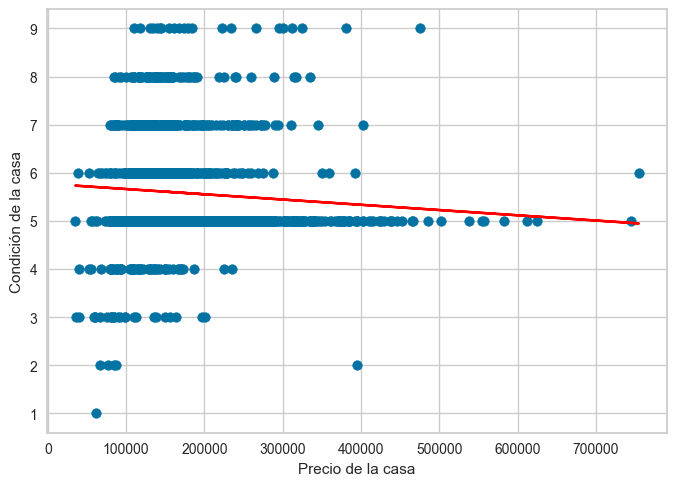

Coeficiente de determinación: 0.006061540238119001
Error cuadrático medio (MSE): 1.2764049787089073


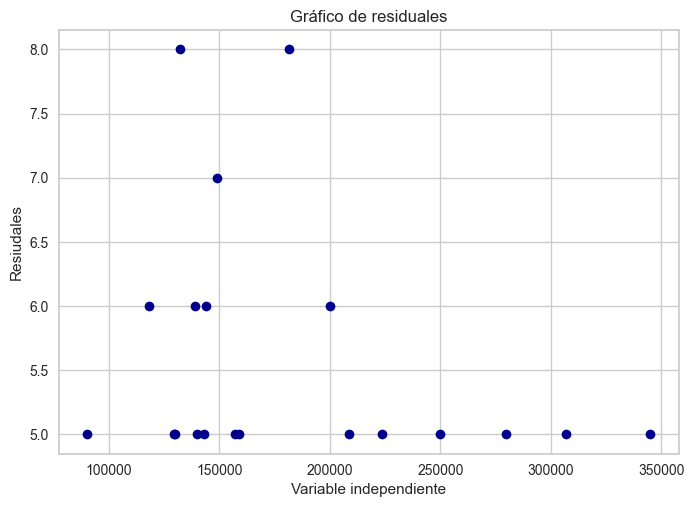

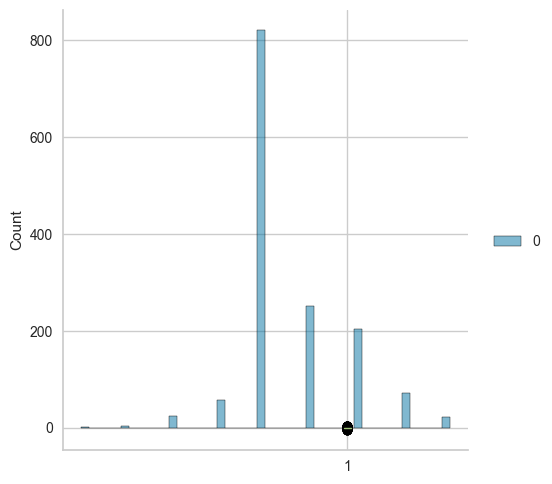

In [ ]:
# Inciso 7

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

datos = pd.read_csv('train.csv')

x = datos["SalePrice"].values.reshape(-1,1)
y = datos["OverallCond"].values.reshape(-1,1)

plt.scatter(x,y)

plt.xlabel("Precio de la casa")
plt.ylabel("Condición de la casa")
plt.show()

# Creando el modelo de regresión lineal.
regresion = LinearRegression()

# Entrenando el modelo.
regresion.fit(x,y)

# Calculando el coeficiente y el intercepto.
coeficiente = regresion.coef_
intercepto = regresion.intercept_

print("Coeficiente: ", coeficiente)
print("Intercepto: ", intercepto)

plt.scatter(x, y)
plt.plot(x, regresion.predict(x), color='red')

plt.xlabel("Precio de la casa")
plt.ylabel("Condición de la casa")

plt.show()

# Calculando el error cuadrático medio.
r_sq = regresion.score(x, y)

print('Coeficiente de determinación:', r_sq)

x_pred = regresion.predict(x)

y_pred = regresion.predict(y)
mse = mean_squared_error(y, y_pred)
print('Error cuadrático medio (MSE):', mse)

# Residuos de la condición.
residuales = y - y_pred

len(residuales)

# Gráfico de residuales.
fig = plt.figure()

x1 = x[:20]
y1 = y[:20]
plt.plot(x1, y1, 'o', color="darkblue")
plt.title("Gráfico de residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Resiudales")
sns.displot(residuales)
plt.boxplot(residuales)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


df = pd.read_csv('train.csv')
# df = pd.DataFrame()

print(df)

NameError: name 'read_csv' is not defined

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


df = pd.read_csv('train.csv')
# df = pd.DataFrame()

print(df)

# Ejercicio 9


sns.pairplot(df[:30])
plt.show()

# Imprimiendo la matriz de correlación.
corr_matrix = df.corr()

corr_matrix

# Determinando que variables tienen una correlación mayor a 0.7
corr_matrix['SalePrice'].sort_values(ascending=False)

a = df["SalePrice"]
b = df["GrLivArea"]

a = sm.add_constant(a)
model = sm.OLS(b, a).fit()
model.summary()

x = df["OverallQual"]
y = df["SalePrice"]

# Creando el modelo de regresión lineal.
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
model1.summary()


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df = read_csv('train.csv')
# df = pd.DataFrame()

print(df)

# Ejercicio 11

x = df["OverallQual"]
y = df["SalePrice"]

x1 = x[:30]
y1 = y[:30]

# Haciendo el entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

model = sm.OLS(y1, sm.add_constant(x1))

x_train_min = X_train[:30]
y_train_min = y_train[:30]

print(len(x_train_min), len(y_train_min))

# Ajustando los datos de entrenamiento.
model.fit(x_train_min, y_train_min)

# Haciendo las predicciones.
y_pred = model.predict(X_test)

# Error cuadrático y coeficiente de determinación.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# # Creando el modelo de regresión lineal.
# x = sm.add_constant(x)
# model1 = sm.OLS(y, x).fit()
# print("Modelo 2: ")

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().